In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# dir_path='/content/drive/MyDrive/Project Internship Flip robo/project3/Data/Glass Identification.csv'
dir_path= 'C:\data trained flip robo intern\project 3\Data Glass project\Glass Identification.csv'

In [3]:
df = pd.read_csv(dir_path)

In [37]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.columns=["No.","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"] 

In [6]:
df=df.drop("No.",axis=1)

In [7]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
dataset=df

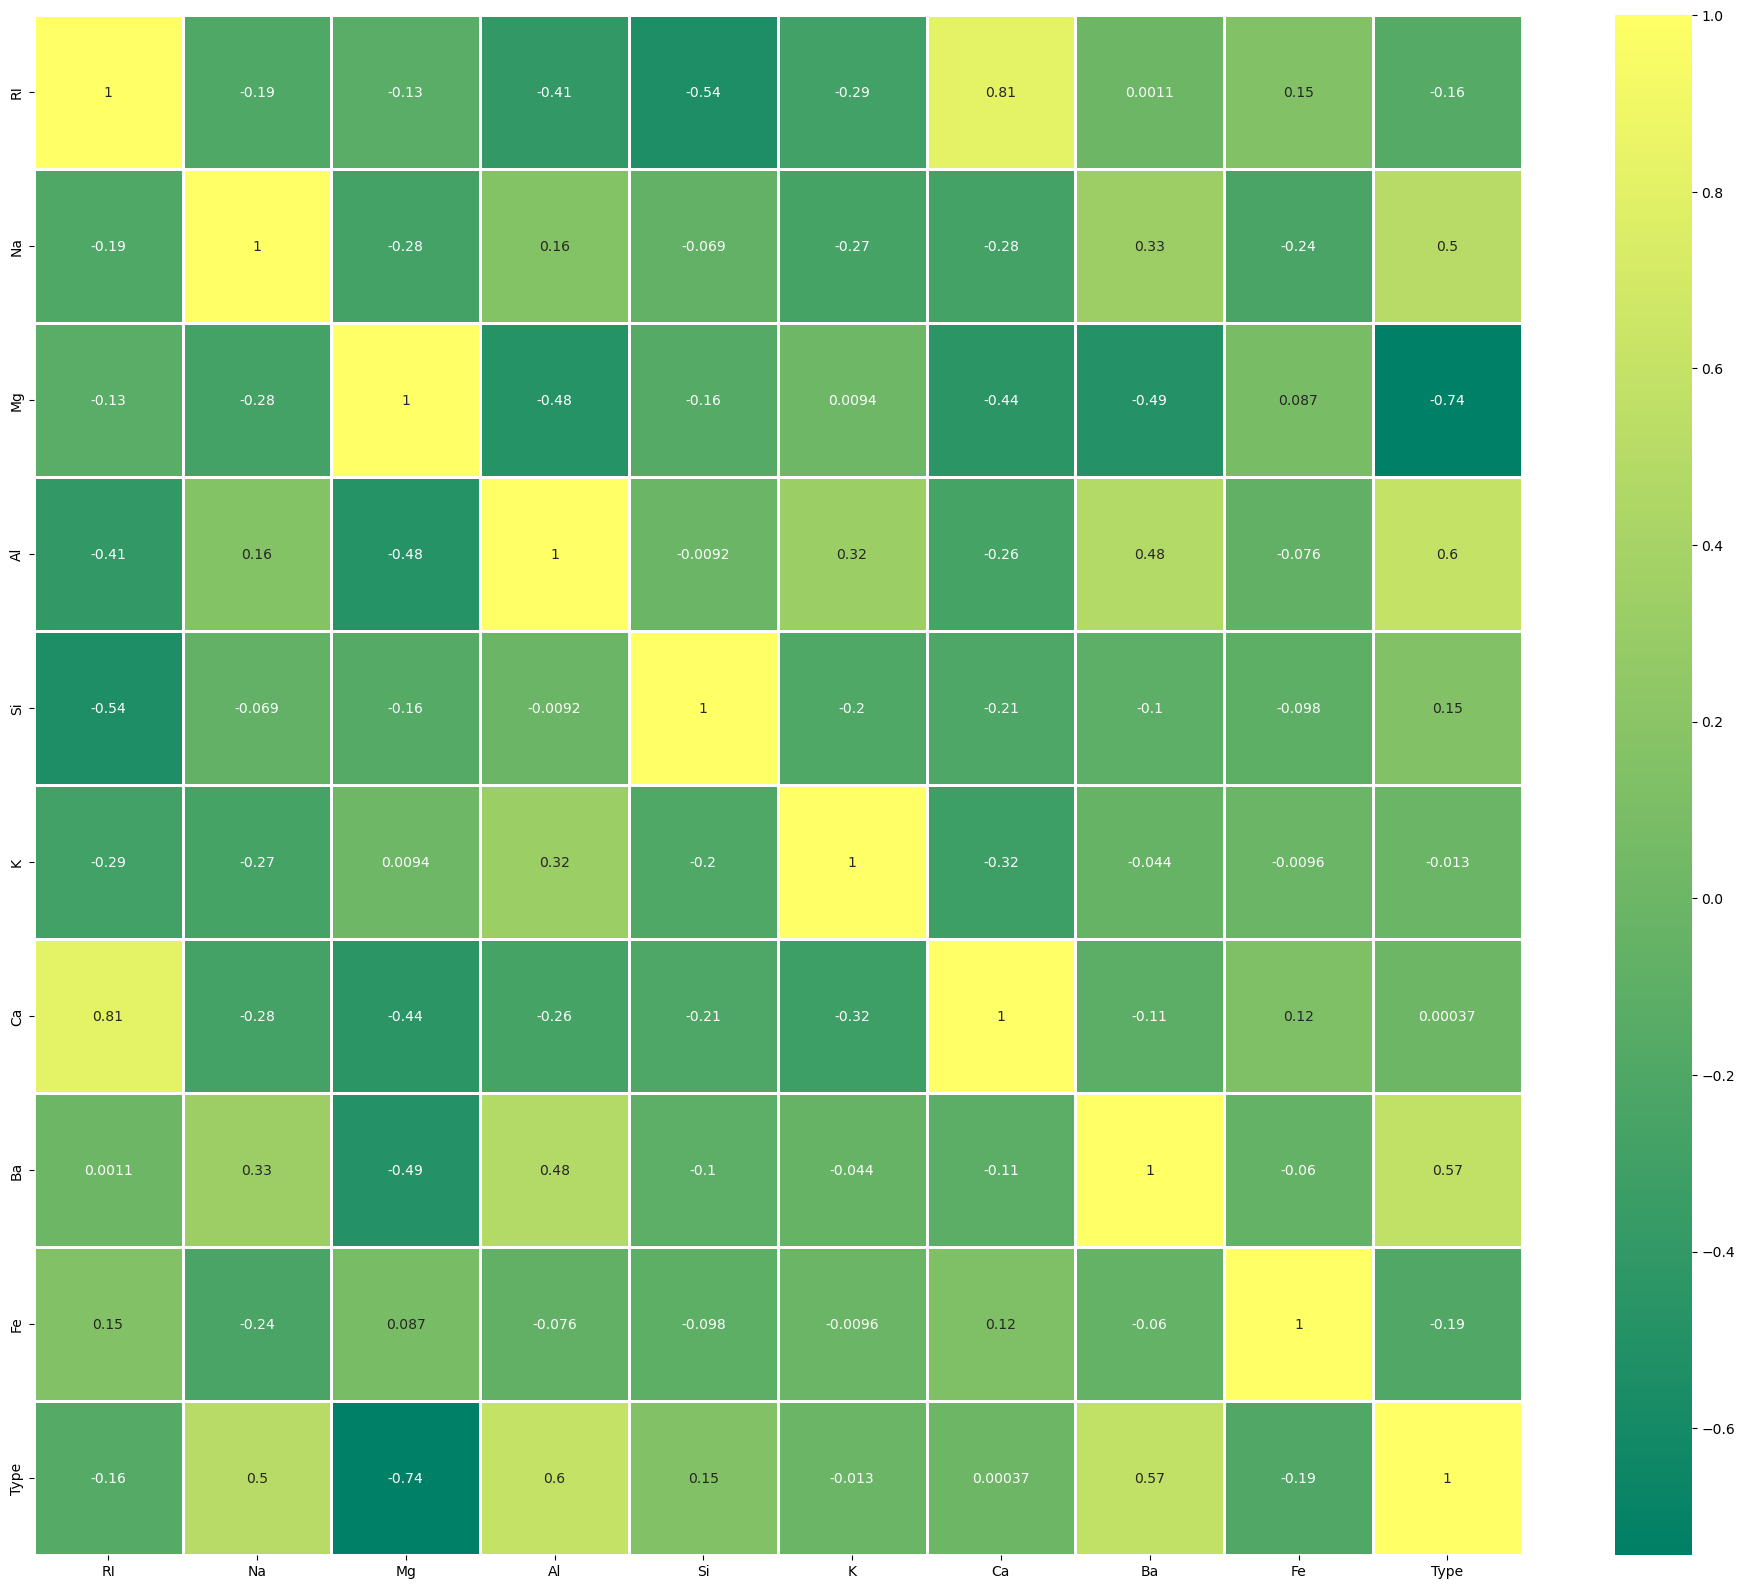

In [13]:
plt.figure(figsize=(24,20))
sns.heatmap(dataset.corr(),annot=True,linecolor="white",linewidths=(1,1),cmap="summer")
plt.show()

In [14]:
X = dataset.iloc[:, [1,2,3,4,7]].values
y = dataset.iloc[:, 9].values

In [26]:
dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [31]:
X

array([[ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       [ 1.51766, 13.21   ,  3.69   , ...,  8.22   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  2,  0,  0,  0,  0],
       [ 9, 13,  0,  1,  0,  0],
       [ 4,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

C:\Users\goswa\AppData\Local\Temp\ipykernel_23464\1832785312.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


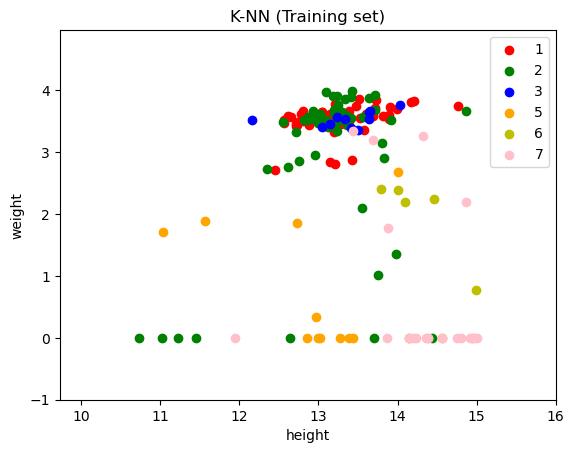

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0]
.max() + 1, step = 0.01),
 np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1]
.max() + 1, step = 0.01))
plt.xlim(X1.min(), X1.max())#Setting limits turns autoscaling off for the x-axis.
plt.ylim(X2.min(), X2.max())
#enumerate allows us to loop over something and have an automatic counter. 
#np.unique returns the unique values from the input array
for i, j in enumerate(np.unique(y_set)):
 plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
 c = ListedColormap(('red', 'green','b','orange','y','pink'))(i),
label = j)
plt.title('K-NN (Training set)')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
scores=[]
for k in range(1,32):
 knn=KNeighborsClassifier(k)
 score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
 score_mean=score_val.mean()
 scores.append(score_mean)
# get index of maxium score along axis, default axis=0 for 1 dimensional array
best_k=np.argmax(scores)+1
print(best_k)
# generate KNN model
knn=KNeighborsClassifier(best_k)
# fit with train data set
knn.fit(X_train,y_train)
# get Modes presicion rate using test set
print("prediction precision rate:",knn.score(X_test,y_test))

C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\goswa\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\goswa\anaconda3\

1
prediction precision rate: 0.7222222222222222


In [24]:
df3=dataset[dataset['Type']==3]
df3=pd.concat([df3]*4)
df5=dataset[dataset['Type']==5]
df5=pd.concat([df5]*5)
df6=dataset[dataset['Type']==6]
df6=pd.concat([df6]*7)
df7=dataset[dataset['Type']==7]
df7=pd.concat([df7]*2)
df1=dataset[dataset['Type']==1]
df2=dataset[dataset['Type']==2]
df_balanced=pd.concat([df1,df2,df3,df5,df6,df7])
df_balanced.shape
dataset.head()
type=df_balanced['Type'].groupby(df_balanced['Type']).count()
type
df6


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
175,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
176,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
177,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
178,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
179,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...
179,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
180,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
181,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
182,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# df.columns is column labels property
features=df_balanced.columns[:-1].tolist()
X=df_balanced[features].values
y=df_balanced['Type']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
score=[]
for i in range(32):
 knn=KNeighborsClassifier(k)
 score_val=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
 score_mean=score_val.mean()
 scores.append(score_mean)
best_K=np.argmax(scores)+1
print('best K is:',best_K)
knn=KNeighborsClassifier(best_K)
knn.fit(X_train,y_train)
print("prediction precision rate:",knn.score(X_test,y_test))

best K is: 1
prediction precision rate: 0.9
